# Project 
## Our Proposal
We choose to divide key-biotopes by the types of habitats they contain. Then run a simple learning algorithm on Laser data (stored in `.laz` files) and see whether we can distinguish areas with that include particular Key-Biotopes from others.

### Method:
Laser measurements are available for square areas, 2.5 km X 2.5 km. To facilitate analysis, we will do it in steps:

- **Step 1:** Divide these squares into smaller squares of equal areas (called henceforth tiles)
- **Step 2:** Compute the percentage of area within a tile which is occupied by key-biotopes. Then, according to these percentages, label tiles for whether they contain key-bishops or not, i.e. a positive set and a negative set.
- **Step 3:** From the laser data, compute a set of variables that characterize each tile.
- **Step 4:** Apply a classification algorithm on the resulting dataset.

# Step 4

Finally the data set is ready. Now we can use supervised learning, apply classification algorithms to the dataset and see whether the algorithm will be able to recognize key-biotopes reliably.

## 4.1 Load and Clean The Dataset
- To Do:
1. Load the dataset prepared in the previous step.
    - A ready to use dataset is provided in "learning_data.csv"
2. Examine the numerical columns. What observations are there to be made regarding the distributions of the data?
3. Is there any data that seems to be incorrect? Fix missing/incorrect data appropriately.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
plt.style.use('seaborn-whitegrid')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

In [2]:
dataset_df = pd.read_csv('files/learning_data/learning_data.csv')

In [3]:
dataset_df.describe()

,bio_ratio,is_KeyBio,C1RN1_count,C1RN1_Zmean,C1RN1_Zstd,C1RN2_count,C1RN2_Zmean,C1RN2_Zstd,C1RN3_count,C1RN3_Zmean,...,C2RN2_Zstd,C2RN3_count,C2RN3_Zmean,C2RN3_Zstd,C2RN4_count,C2RN4_Zmean,C2RN4_Zstd,C2RN5_count,C2RN5_Zmean,C2RN5_Zstd
count,1000.000000,1000.00000,997.000000,997.000000,997.000000,997.000000,943.000000,943.000000,997.000000,939.000000,...,946.000000,949.000000,941.000000,941.000000,949.000000,930.000000,930.000000,949.000000,805.000000,805.000000
mean,0.353233,0.50000,0.429883,11.007431,5.521581,0.112015,8.368067,5.124314,0.017259,5.862909,...,0.168833,0.039566,1.041775,0.156535,0.002226,1.099244,0.169922,0.000114,1.141270,0.126926
std,0.366560,0.50025,0.160092,12.925354,1.883892,0.053816,12.985779,1.221528,0.011989,13.054089,...,0.285645,0.016050,12.896783,0.235663,0.001891,12.959249,0.204102,0.000157,13.660656,0.186456
min,0.000000,0.00000,0.016528,0.000000,0.000000,0.000000,0.329934,0.661834,0.000000,0.055000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.373925,8.273576,4.656169,0.081449,5.755758,4.373392,0.008190,3.421237,...,0.087487,0.029804,0.047401,0.087976,0.000824,0.091501,0.109649,0.000014,0.076296,0.071336
50%,0.487133,0.50000,0.426600,10.716340,5.754551,0.114702,7.366743,5.112981,0.015243,4.691261,...,0.118805,0.041660,0.074490,0.119512,0.001652,0.131023,0.142728,0.000057,0.126667,0.112143
75%,0.672856,1.00000,0.462225,12.747138,6.697901,0.153397,9.127718,5.903866,0.024914,6.307615,...,0.171080,0.050698,0.099786,0.164002,0.003230,0.165640,0.180006,0.000153,0.176000,0.158506
max,1.000000,1.00000,1.000000,290.984543,14.220972,0.221376,291.014566,14.358917,0.057830,292.302080,...,4.638094,0.078899,288.604871,3.480969,0.013887,288.925405,4.228307,0.001400,289.386667,4.569586


In [4]:
dataset_df.columns

Index(['Tile_ID', 'Las_Namn', 'bio_ratio', 'is_KeyBio', 'C1RN1_count',
       'C1RN1_Zmean', 'C1RN1_Zstd', 'C1RN2_count', 'C1RN2_Zmean', 'C1RN2_Zstd',
       'C1RN3_count', 'C1RN3_Zmean', 'C1RN3_Zstd', 'C1RN4_count',
       'C1RN4_Zmean', 'C1RN4_Zstd', 'C1RN5_count', 'C1RN5_Zmean', 'C1RN5_Zstd',
       'C2RN1_count', 'C2RN1_Zmean', 'C2RN1_Zstd', 'C2RN2_count',
       'C2RN2_Zmean', 'C2RN2_Zstd', 'C2RN3_count', 'C2RN3_Zmean', 'C2RN3_Zstd',
       'C2RN4_count', 'C2RN4_Zmean', 'C2RN4_Zstd', 'C2RN5_count',
       'C2RN5_Zmean', 'C2RN5_Zstd'],
      dtype='object')

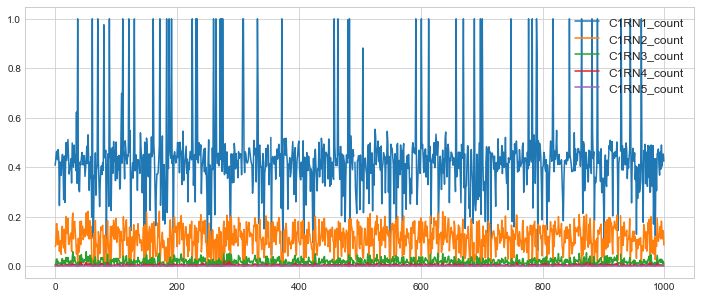

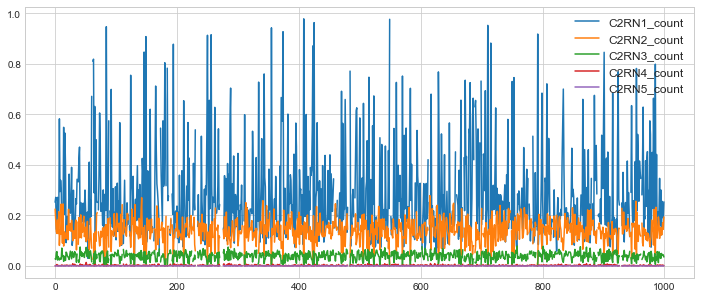

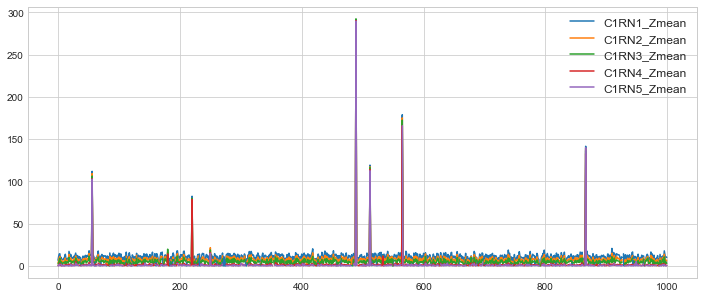

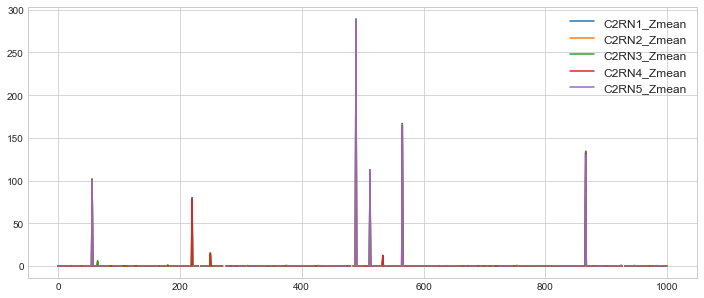

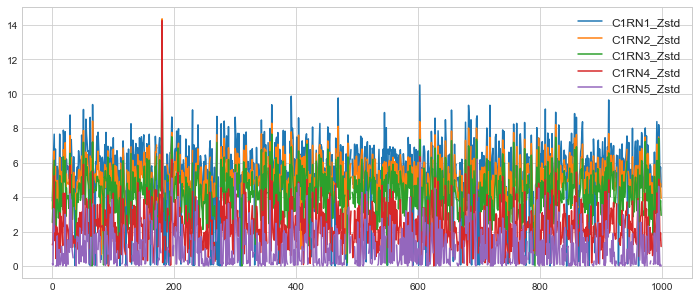

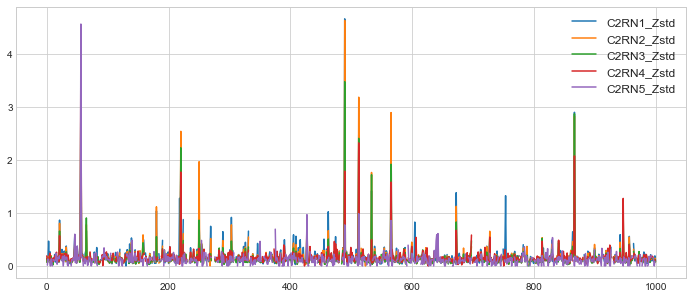

In [5]:
for i in range(3):
    for j in range(2):
        dataset_df.iloc[:,[4+15*j+i,7+15*j+i,10+15*j+i,13+15*j+i,16+15*j+i]].plot()

In [6]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tile_ID      1000 non-null   object 
 1   Las_Namn     1000 non-null   object 
 2   bio_ratio    1000 non-null   float64
 3   is_KeyBio    1000 non-null   int64  
 4   C1RN1_count  997 non-null    float64
 5   C1RN1_Zmean  997 non-null    float64
 6   C1RN1_Zstd   997 non-null    float64
 7   C1RN2_count  997 non-null    float64
 8   C1RN2_Zmean  943 non-null    float64
 9   C1RN2_Zstd   943 non-null    float64
 10  C1RN3_count  997 non-null    float64
 11  C1RN3_Zmean  939 non-null    float64
 12  C1RN3_Zstd   939 non-null    float64
 13  C1RN4_count  997 non-null    float64
 14  C1RN4_Zmean  930 non-null    float64
 15  C1RN4_Zstd   930 non-null    float64
 16  C1RN5_count  997 non-null    float64
 17  C1RN5_Zmean  831 non-null    float64
 18  C1RN5_Zstd   831 non-null    float64
 19  C2RN1_c

In [7]:
dataset_df.dropna(thresh= 5, inplace= True)

In [8]:
dataset_df.replace(np.nan, 0, inplace= True)

## 4.3 Preprocessing
Prepare the dataset for use in a classification algorithm.
Some classifiers calculate the Euclidean distance between two instances. If one of the features has a broad range of values, it will dominate this distance. For this reason all features can be divided by their maximum value, or mean, or some other suitable option.

- To Do:
1. (Normalize) Rescale features to have the same weight
2. Split the dataset into a matrix of features and target list of labels

In [9]:
dataset_df.iloc[:,4:]= dataset_df.iloc[:,4:]/dataset_df.iloc[:,4:].max()

In [10]:
X = dataset_df.drop(columns=['Tile_ID', 'Las_Namn', 'bio_ratio', 'is_KeyBio']).values

X.shape

(997, 30)

In [11]:
y = dataset_df.is_KeyBio.values

y.shape

(997,)

## 4.4 Classification
Finally, having all the features in the right scalings, one can start experimenting with different classification algorithms.
- To Do:
- After obtaining a classification, it is important to evaluate it. Choose a suitable metric to measure the performance of the classification.
- Split the data into a train set, a test set and a validation set if one wants to compare and choose between classification algorithms
        - Test data is used only for assessing performance at the end of the process.
        - Validation data is used explicitly to select the parameter/models with the best performance.
        - Training data are used to learn the instance of the model from a model class.

In [12]:
from sklearn import model_selection

In [13]:
#Train_test split
PRC = 0.1
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= PRC, random_state=42)

In [14]:
# use decision trees
from sklearn import tree
from sklearn import metrics

Mean accuracy: [0.74797753 0.75908864 0.74463171 0.75123596 0.75690387 0.74021223
 0.74580524 0.72794007 0.73566792 0.72229713 0.7290387  0.72790262
 0.72795256 0.72228464 0.73126092 0.71787765 0.72121099 0.71672909]
Selected model index: 1
Complexity: 3


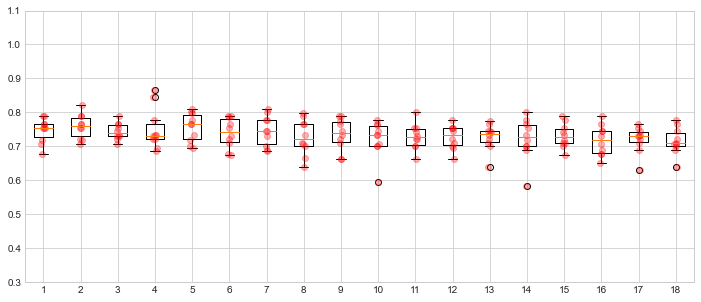

In [15]:
#Create a 10-fold cross validation set
kf=model_selection.KFold(n_splits=10, shuffle=True, random_state=0)     


#Search the parameter among the following
C=np.arange(2,20,)
acc = np.zeros((10,18))

i=0
for train_index, val_index in kf.split(X_train):
    X_t, X_val = X_train[train_index], X_train[val_index]
    y_t, y_val = y_train[train_index], y_train[val_index]
    j=0
    for c in C:
        dt = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=c)
        dt.fit(X_t,y_t)
        yhat = dt.predict(X_val)
        acc[i][j] = metrics.accuracy_score(yhat, y_val)
        j=j+1
    i=i+1

print('Mean accuracy: ' + str(np.mean(acc,axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(acc,axis = 0))))
print('Complexity: ' + str(C[np.argmax(np.mean(acc,axis = 0))]))

plt.boxplot(acc);
for i in range(18):
    xderiv = (i+1)*np.ones(acc[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc[:,i],'ro',alpha=0.3)


plt.ylim((0.3,1.1))
fig = plt.gcf()
fig.set_size_inches(12,5)

In [16]:
#Train the model with the complete training set with the selected complexity
dt = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C[np.argmax(np.mean(acc,axis = 0))])
dt.fit(X_train,y_train)

#Test the model with the test set 
yhat = dt.predict(X_test)
print('Test accuracy: ' + str(metrics.accuracy_score(yhat, y_test)))

Test accuracy: 0.72


Confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ and predicted to be in group $j$.

In our case, the count of true negatives is $C_{0,0}$, false negatives is $C_{1,0}$, true positives is $C_{1,1}$ and false positives is $C_{0,1}$.

precision $ = C_{1,1}/(C_{0,1}+ C_{1,1})$, recall $= C_{1,1}/ (C_{1,0} + C_{1,1})$.

In [17]:
metrics.confusion_matrix(y_test,yhat)

array([[39, 16],
       [12, 33]], dtype=int64)

In [21]:
print('accuracy = ', metrics.accuracy_score(y_test, yhat))
print('precision = ', metrics.precision_score(y_test, yhat))
print('recall = ', metrics.recall_score(y_test, yhat))

accuracy =  0.72
precision =  0.673469387755102
recall =  0.7333333333333333


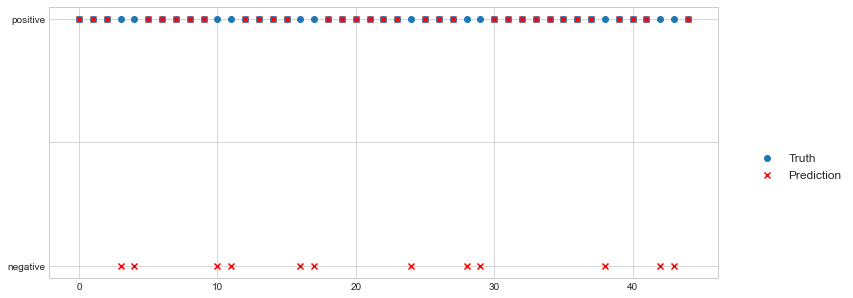

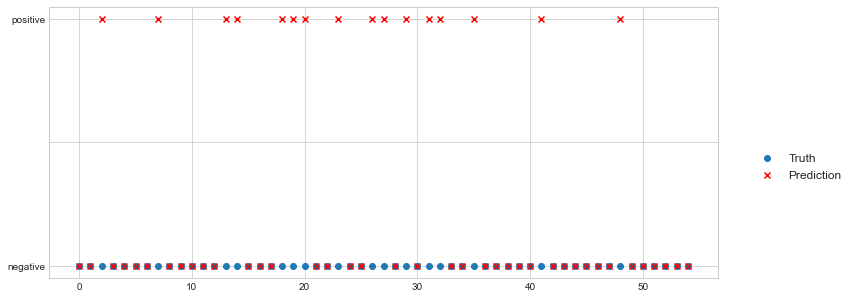

In [20]:
# lets visualize this
value = {'positive':1, 'negative': 0}

for x in ['positive', 'negative']:
    indx = (y_test == value[x])
    truth = y_test[indx]
    predicted = yhat[indx]
    
    fig, ax= plt.subplots()
    ax.scatter(x= range(len(truth)), y= truth, label='Truth')
    ax.scatter(x= range(len(truth)), y= predicted, color= 'r', marker='x', label = 'Prediction')
    ax.legend(bbox_to_anchor = (1.2,0.5))
    ax.set_yticks([0, 0.5, 1])
    ax.set_yticklabels(['negative', '', 'positive'])
    plt.show()

# Discussion
Reflecting on the problem as we stated it "to recognize coniferous forests with high conservation value", and on the solution we proposed. There were several choices we made along the way where one can make possible improvements. After some trials, it might be possible to conclude that the whole approach to summarize laser data is not appropriate. Instead, The problem may not be well stated.

Possible directions for improvement:
- Get more data
- Use a different grouping of key-biotopes
- Summarize laser data differently
- Tweak parameters like the size of tiles and the threshold of area occupied by key-biotope
- It might be more suitable to attempt a probabilistic classification, or a regression.